In [ ]:
import pandas as pd

df = pd.read_csv("us_presidents.csv")



In [ ]:
df.head()

,Unnamed: 0,S.No.,start,end,president,prior,party,vice
0,0,1,"April 30, 1789","March 4, 1797",George Washington,Commander-in-Chief of the Continental Army ...,Nonpartisan [13],John Adams
1,1,2,"March 4, 1797","March 4, 1801",John Adams,1st Vice President of the United States,Federalist,Thomas Jefferson
2,2,3,"March 4, 1801","March 4, 1809",Thomas Jefferson,2nd Vice President of the United States,Democratic- Republican,Aaron Burr
3,3,4,"March 4, 1809","March 4, 1817",James Madison,5th United States Secretary of State (1801–...,Democratic- Republican,George Clinton
4,4,5,"March 4, 1817","March 4, 1825",James Monroe,7th United States Secretary of State (1811–...,Democratic- Republican,Daniel D. Tompkins


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  45 non-null     int64 
 1   S.No.       45 non-null     int64 
 2   start       45 non-null     object
 3   end         44 non-null     object
 4   president   45 non-null     object
 5   prior       45 non-null     object
 6   party       45 non-null     object
 7   vice        45 non-null     object
dtypes: int64(2), object(6)
memory usage: 2.9+ KB


In [ ]:
df.describe()

,Unnamed: 0,S.No.
count,45.000000,45.000000
mean,22.000000,23.000000
std,13.133926,13.133926
min,0.000000,1.000000
25%,11.000000,12.000000
50%,22.000000,23.000000
75%,33.000000,34.000000
max,44.000000,45.000000


In [ ]:
df.isnull().sum()

,0
Unnamed: 0,0
S.No.,0
start,0
end,1
president,0
prior,0
party,0
vice,0


In [ ]:
df.dropna(inplace=True)

In [ ]:
df.isnull().sum()

,0
Unnamed: 0,0
S.No.,0
start,0
end,0
president,0
prior,0
party,0
vice,0


In [ ]:
print("Invalid start dates:", df['start'].isna().sum())
print("Invalid end dates:", df['end'].isna().sum())


Invalid start dates: 0
Invalid end dates: 0


In [ ]:
df['Presidency_Start'] = pd.to_datetime(df['start'])
df['Presidency_End'] = pd.to_datetime(df['end'], errors='coerce')

df=df.drop(columns=["Unnamed: 0"])

In [ ]:
df.head()

,S.No.,start,end,president,prior,party,vice,Presidency_Start,Presidency_End
0,1,"April 30, 1789","March 4, 1797",George Washington,Commander-in-Chief of the Continental Army ...,Nonpartisan [13],John Adams,1789-04-30,1797-03-04
1,2,"March 4, 1797","March 4, 1801",John Adams,1st Vice President of the United States,Federalist,Thomas Jefferson,1797-03-04,1801-03-04
2,3,"March 4, 1801","March 4, 1809",Thomas Jefferson,2nd Vice President of the United States,Democratic- Republican,Aaron Burr,1801-03-04,1809-03-04
3,4,"March 4, 1809","March 4, 1817",James Madison,5th United States Secretary of State (1801–...,Democratic- Republican,George Clinton,1809-03-04,1817-03-04
4,5,"March 4, 1817","March 4, 1825",James Monroe,7th United States Secretary of State (1811–...,Democratic- Republican,Daniel D. Tompkins,1817-03-04,1825-03-04


In [ ]:
df.drop(['start', 'end'], axis=1, inplace=True)

In [ ]:
df.head()

,S.No.,president,prior,party,vice,Presidency_Start,Presidency_End
0,1,George Washington,Commander-in-Chief of the Continental Army ...,Nonpartisan [13],John Adams,1789-04-30,1797-03-04
1,2,John Adams,1st Vice President of the United States,Federalist,Thomas Jefferson,1797-03-04,1801-03-04
2,3,Thomas Jefferson,2nd Vice President of the United States,Democratic- Republican,Aaron Burr,1801-03-04,1809-03-04
3,4,James Madison,5th United States Secretary of State (1801–...,Democratic- Republican,George Clinton,1809-03-04,1817-03-04
4,5,James Monroe,7th United States Secretary of State (1811–...,Democratic- Republican,Daniel D. Tompkins,1817-03-04,1825-03-04


Partywise Distribution of Presidents

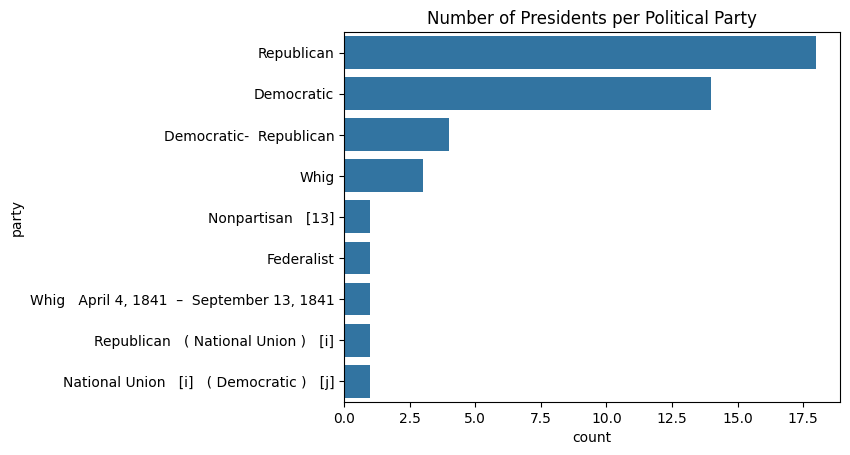

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

sns.countplot(data=df, y='party', order=df['party'].value_counts().index)
plt.title("Number of Presidents per Political Party")
plt.show()


In [ ]:
df['term_duration'] = (df['Presidency_End'] - df['Presidency_Start'])

df.head()

,S.No.,president,prior,party,vice,Presidency_Start,Presidency_End,term_duration
0,1,George Washington,Commander-in-Chief of the Continental Army ...,Nonpartisan [13],John Adams,1789-04-30,1797-03-04,2865 days
1,2,John Adams,1st Vice President of the United States,Federalist,Thomas Jefferson,1797-03-04,1801-03-04,1460 days
2,3,Thomas Jefferson,2nd Vice President of the United States,Democratic- Republican,Aaron Burr,1801-03-04,1809-03-04,2922 days
3,4,James Madison,5th United States Secretary of State (1801–...,Democratic- Republican,George Clinton,1809-03-04,1817-03-04,2922 days
4,5,James Monroe,7th United States Secretary of State (1811–...,Democratic- Republican,Daniel D. Tompkins,1817-03-04,1825-03-04,2922 days


Arranging President in descending order of Termlength

In [ ]:
President_term_length = df[['president', 'term_duration']].sort_values(by='term_duration', ascending=False)
President_term_length.head(10)


,president,term_duration
42,George W. Bush,2922 days
17,Ulysses S. Grant,2922 days
2,Thomas Jefferson,2922 days
3,James Madison,2922 days
4,James Monroe,2922 days
41,Bill Clinton,2922 days
6,Andrew Jackson,2922 days
39,Ronald Reagan,2922 days
33,Dwight D. Eisenhower,2922 days
27,Woodrow Wilson,2922 days
